In [108]:
import matplotlib.pyplot as plt
import numpy as np

Moore's Law as an exponential function
log(transistor_count) = A.year + B

Transistor count doubles every 2 years.
Transistor count in 1971 = 2250

transistor_count(year + 2)/transistor_count(year) = 2

A = log(2)/2
B = -675.4

In [109]:
A = np.log(2)/2
B = np.log(2250) - A*1971
Moores_law = lambda year: np.exp(B) * np.exp(A*year)

In 1971 the Intel 4004 chip had 2250 transistors on it. Using Moore's law to check the number of transistors it would have in 1973.

In [110]:
ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)

print("In 1973, G. Moore expects {:.0f} transistors on Intels chips".format(ML_1973))
print("This is x{:.2f} more transistors than 1971".format(ML_1973 / ML_1971))

In 1973, G. Moore expects 4500 transistors on Intels chips
This is x2.00 more transistors than 1971


Load the transistor count and year value from the transistor-counts.csv file

In [111]:
data = np.loadtxt('transistor_data.csv', delimiter=',', usecols=[1,2], skiprows=1)
data

array([[2.250000e+03, 1.971000e+03],
       [3.500000e+03, 1.972000e+03],
       [2.500000e+03, 1.973000e+03],
       [3.000000e+03, 1.974000e+03],
       [4.100000e+03, 1.974000e+03],
       [6.000000e+03, 1.974000e+03],
       [8.000000e+03, 1.974000e+03],
       [4.528000e+03, 1.975000e+03],
       [4.000000e+03, 1.975000e+03],
       [5.000000e+03, 1.975000e+03],
       [6.500000e+03, 1.976000e+03],
       [8.500000e+03, 1.976000e+03],
       [9.000000e+03, 1.978000e+03],
       [2.900000e+04, 1.978000e+03],
       [2.900000e+04, 1.979000e+03],
       [1.150000e+04, 1.981000e+03],
       [5.500000e+04, 1.982000e+03],
       [6.800000e+04, 1.979000e+03],
       [1.340000e+05, 1.982000e+03],
       [2.200000e+04, 1.983000e+03],
       [2.000000e+05, 1.984000e+03],
       [2.750000e+05, 1.985000e+03],
       [2.500000e+04, 1.985000e+03],
       [1.600000e+04, 1.985000e+03],
       [2.500000e+04, 1.986000e+03],
       [2.500000e+05, 1.988000e+03],
       [1.180235e+06, 1.989000e+03],
 

In [112]:
year = data[:,1] 
transistor_count = data[:,0]

print("year:\t\t", year[:10])
print("trans. count:\t", transistor_count[:10])

year:		 [1971. 1972. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975.]
trans. count:	 [2250. 3500. 2500. 3000. 4100. 6000. 8000. 4528. 4000. 5000.]


In [113]:
yi = np.log(transistor_count)
yi

array([ 7.7186855 ,  8.16051825,  7.82404601,  8.00636757,  8.31874225,
        8.69951475,  8.98719682,  8.41803562,  8.29404964,  8.51719319,
        8.77955746,  9.04782144,  9.10497986, 10.27505111, 10.27505111,
        9.35010231, 10.91508846, 11.12726298, 11.80559508,  9.99879773,
       12.20607265, 12.52452638, 10.1266311 ,  9.680344  , 10.1266311 ,
       12.4292162 , 13.98122413, 12.61153775, 14.11561515, 10.30895266,
       14.94691267, 13.26901803, 15.52025865, 15.27412558, 15.83041358,
       15.83041358, 15.99026228, 16.06680236, 16.860033  , 17.12605357,
       17.62217305, 16.87421763, 16.90655301, 17.55318018, 17.82284374,
       18.53400943, 18.94540927, 19.03044632, 17.66565816, 17.81003478,
       18.47800581, 19.2091381 , 19.30030749, 19.48883383, 18.94540927,
       19.83166772, 19.95323761, 17.0736071 , 20.44619394, 20.19901719,
       19.83410377, 19.25358987, 20.40992402, 20.48627688, 20.62233992,
       20.72326584, 20.87168584, 20.88026959, 20.90558739, 20.90

In [114]:
model = np.polynomial.Polynomial.fit(year, yi, deg=1)
model = model.convert()
model

Polynomial([-6.75320769e+02,  3.46205857e-01], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [115]:
Bi, Ai = model
Bi, Ai

(-675.3207685510152, 0.34620585732635056)

In [116]:
print(f"Rate of semiconductor added on a chip every 2 years: {np.exp(2*Ai):.2f}")

Rate of semiconductor added on a chip every 2 years: 2.00


Text(0, 0.5, '# of transistors\nper microprocessor')

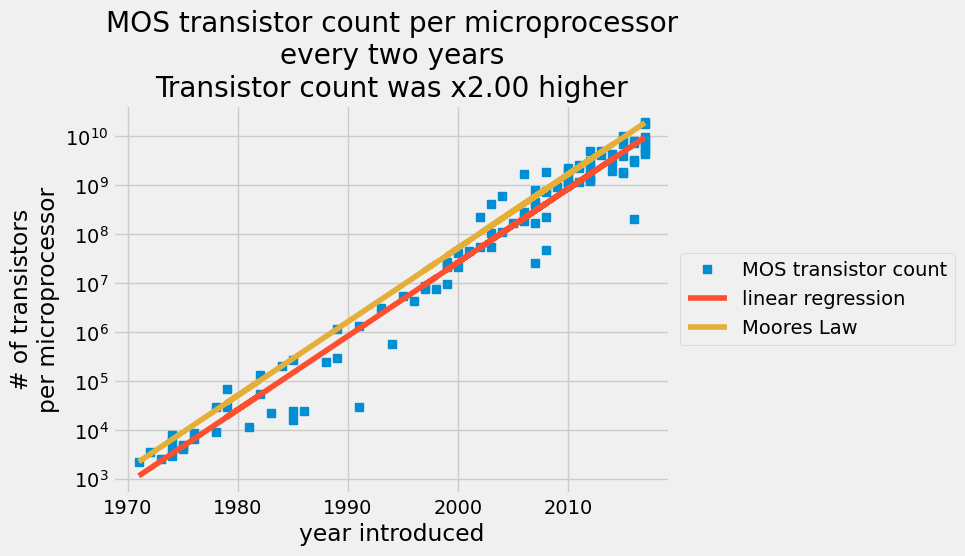

In [117]:
transistor_count_prediction = np.exp(Bi)*np.exp(Ai*year)
transistor_moores_law = Moores_law(year)

plt.style.use("fivethirtyeight")
plt.semilogy(year, transistor_count, "s", label= "MOS transistor count")
plt.semilogy(year, transistor_count_prediction, label = "linear regression")
plt.plot(year, transistor_moores_law, label="Moores Law")

plt.title("MOS transistor count per microprocessor\n" + "every two years\n" + "Transistor count was x{:.2f} higher".format(np.exp(Ai*2)))

plt.xlabel("year introduced")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("# of transistors\nper microprocessor")

Prediction for 2017

19200000000.0 4300000000.0 9637500000.0


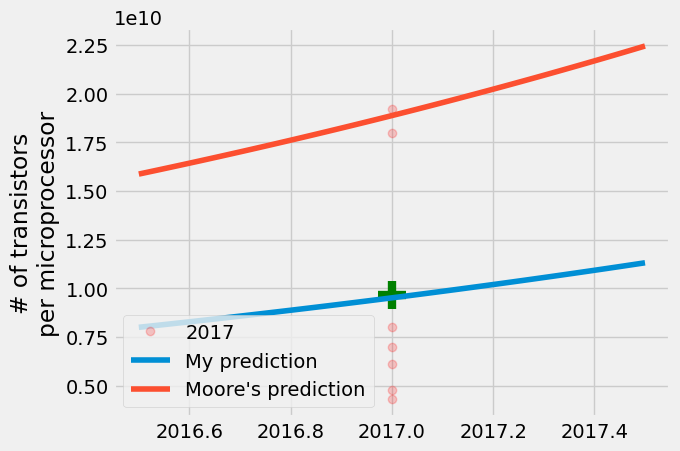

In [120]:
transistor_count2017 = transistor_count[year == 2017]
print(transistor_count2017.max(), transistor_count2017.min(), transistor_count2017.mean())

y = np.linspace(2016.5, 2017.5)

my_model2017 = np.exp(Bi) * np.exp(Ai * y)
Moore_model2017 = Moores_law(y)

plt.plot(2017 * np.ones(np.sum(year == 2017)), transistor_count2017, "ro", label="2017", alpha = 0.2)
plt.plot(2017, transistor_count2017.mean(), "g+", markersize=20, mew = 6)


plt.plot(y, my_model2017, label="My prediction")
plt.plot(y, Moore_model2017, label="Moore's prediction")
plt.ylabel("# of transistors\nper microprocessor")
plt.legend(loc = "lower left")